___
<a href='http://www.kgptalkie.com'><img src='kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a></em></center>

# Cross Validation, Regularization and Hyperparameter Optimization 

### Cross Validation
- Cross-validation is a technique for validating the model efficiency by training it on the subset of input data and testing on previously unseen subset of the input data.
- It is used to estimate the skill of the model on new data.
- We can also say that it is a technique to check how a statistical model generalizes to an independent dataset.

### Regularization

- Regularization is a technique to avoid overfitting of the model.
- It is used to penalize the model for having high complexity.

### Hyperparameter Optimization

- Hyperparameter optimization is a technique to find the best set of hyperparameters for the model.
- It is used to find the best set of hyperparameters for the model.

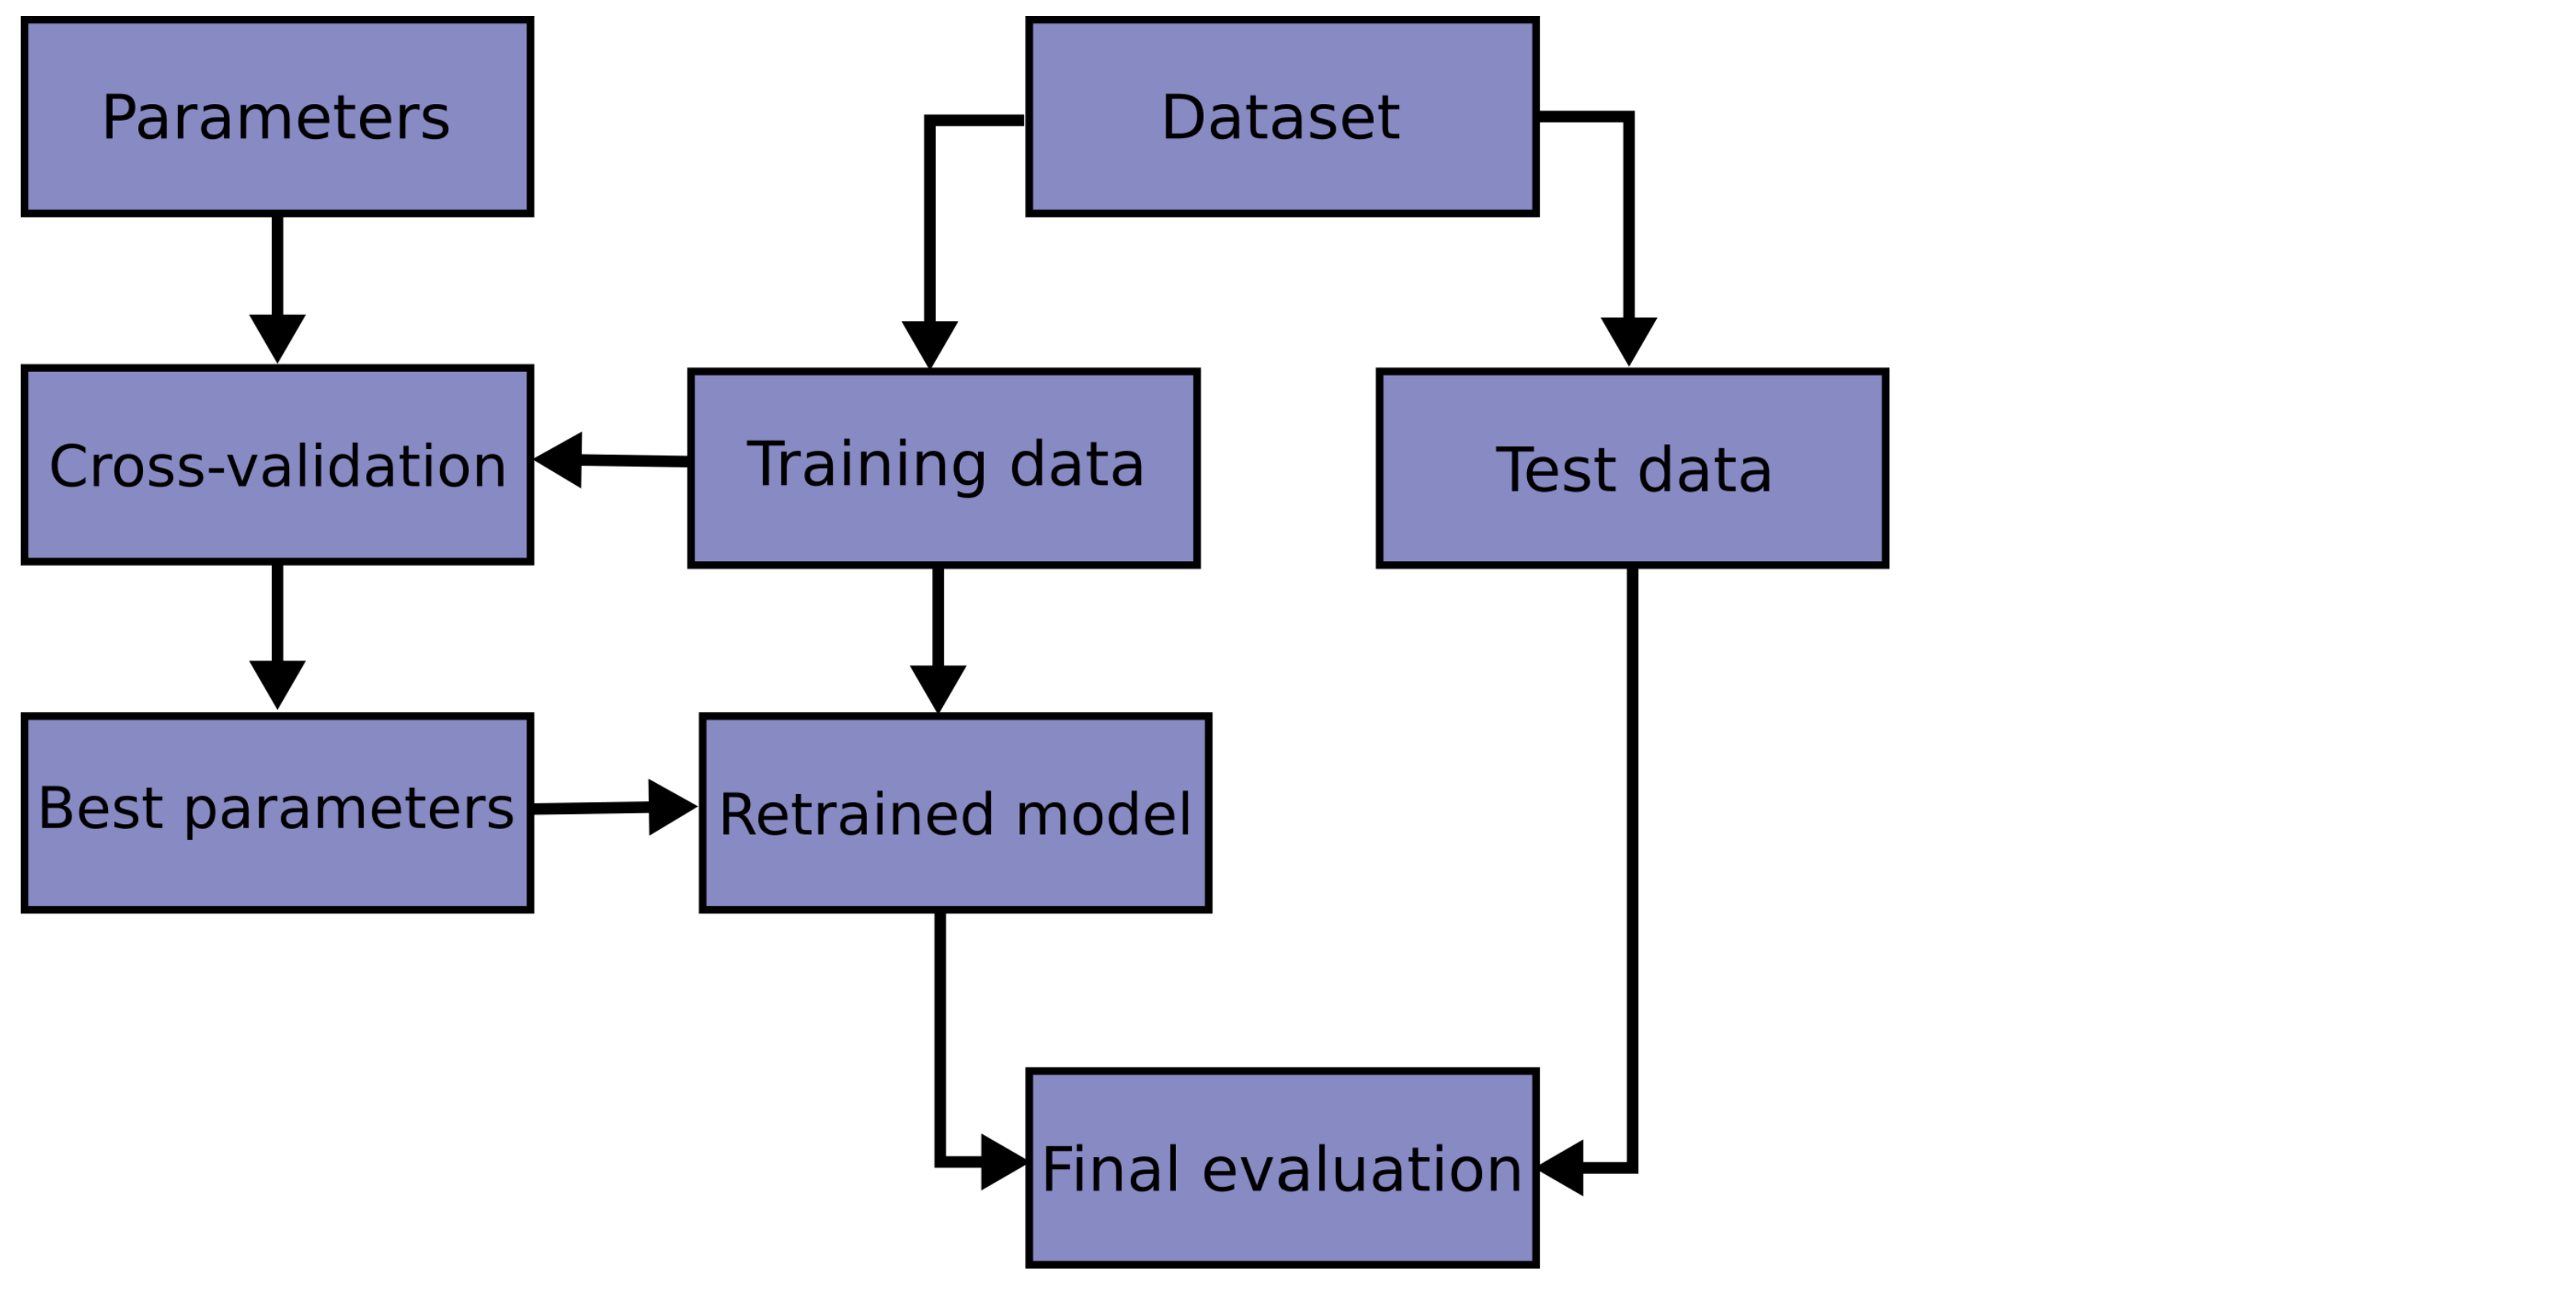

### ML Training Process

- Data Collection
    - Data collection is the process of gathering and measuring information on targeted variables in an established system, which then enables one to answer relevant questions and evaluate outcomes.
- Data Preprocessing
    - Data preprocessing is a data mining technique that involves transforming raw data into an understandable format.

- Data Splitting
    - Data splitting is a technique to split the data into training and testing data.

- Model Training
    - Model training is a process of training the model on the training data.

- Model Evaluation
    - Model evaluation is a process of evaluating the model on the testing data.
    - It is used to check the performance of the model.
- Model Tuning
    - Model tuning is a process of tuning the hyperparameters of the model.
    - It is used to improve the performance of the model.
    - It is also called hyperparameter optimization.
    - It is used to find the best set of hyperparameters for the model.
    - It is used to avoid overfitting of the model.
- Model Deployment
    - Model deployment is a process of deploying the model in the production environment.
    - It is used to make the model available for the end users.

### Dataset Loading
#### Breast Cancer Dataset
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html




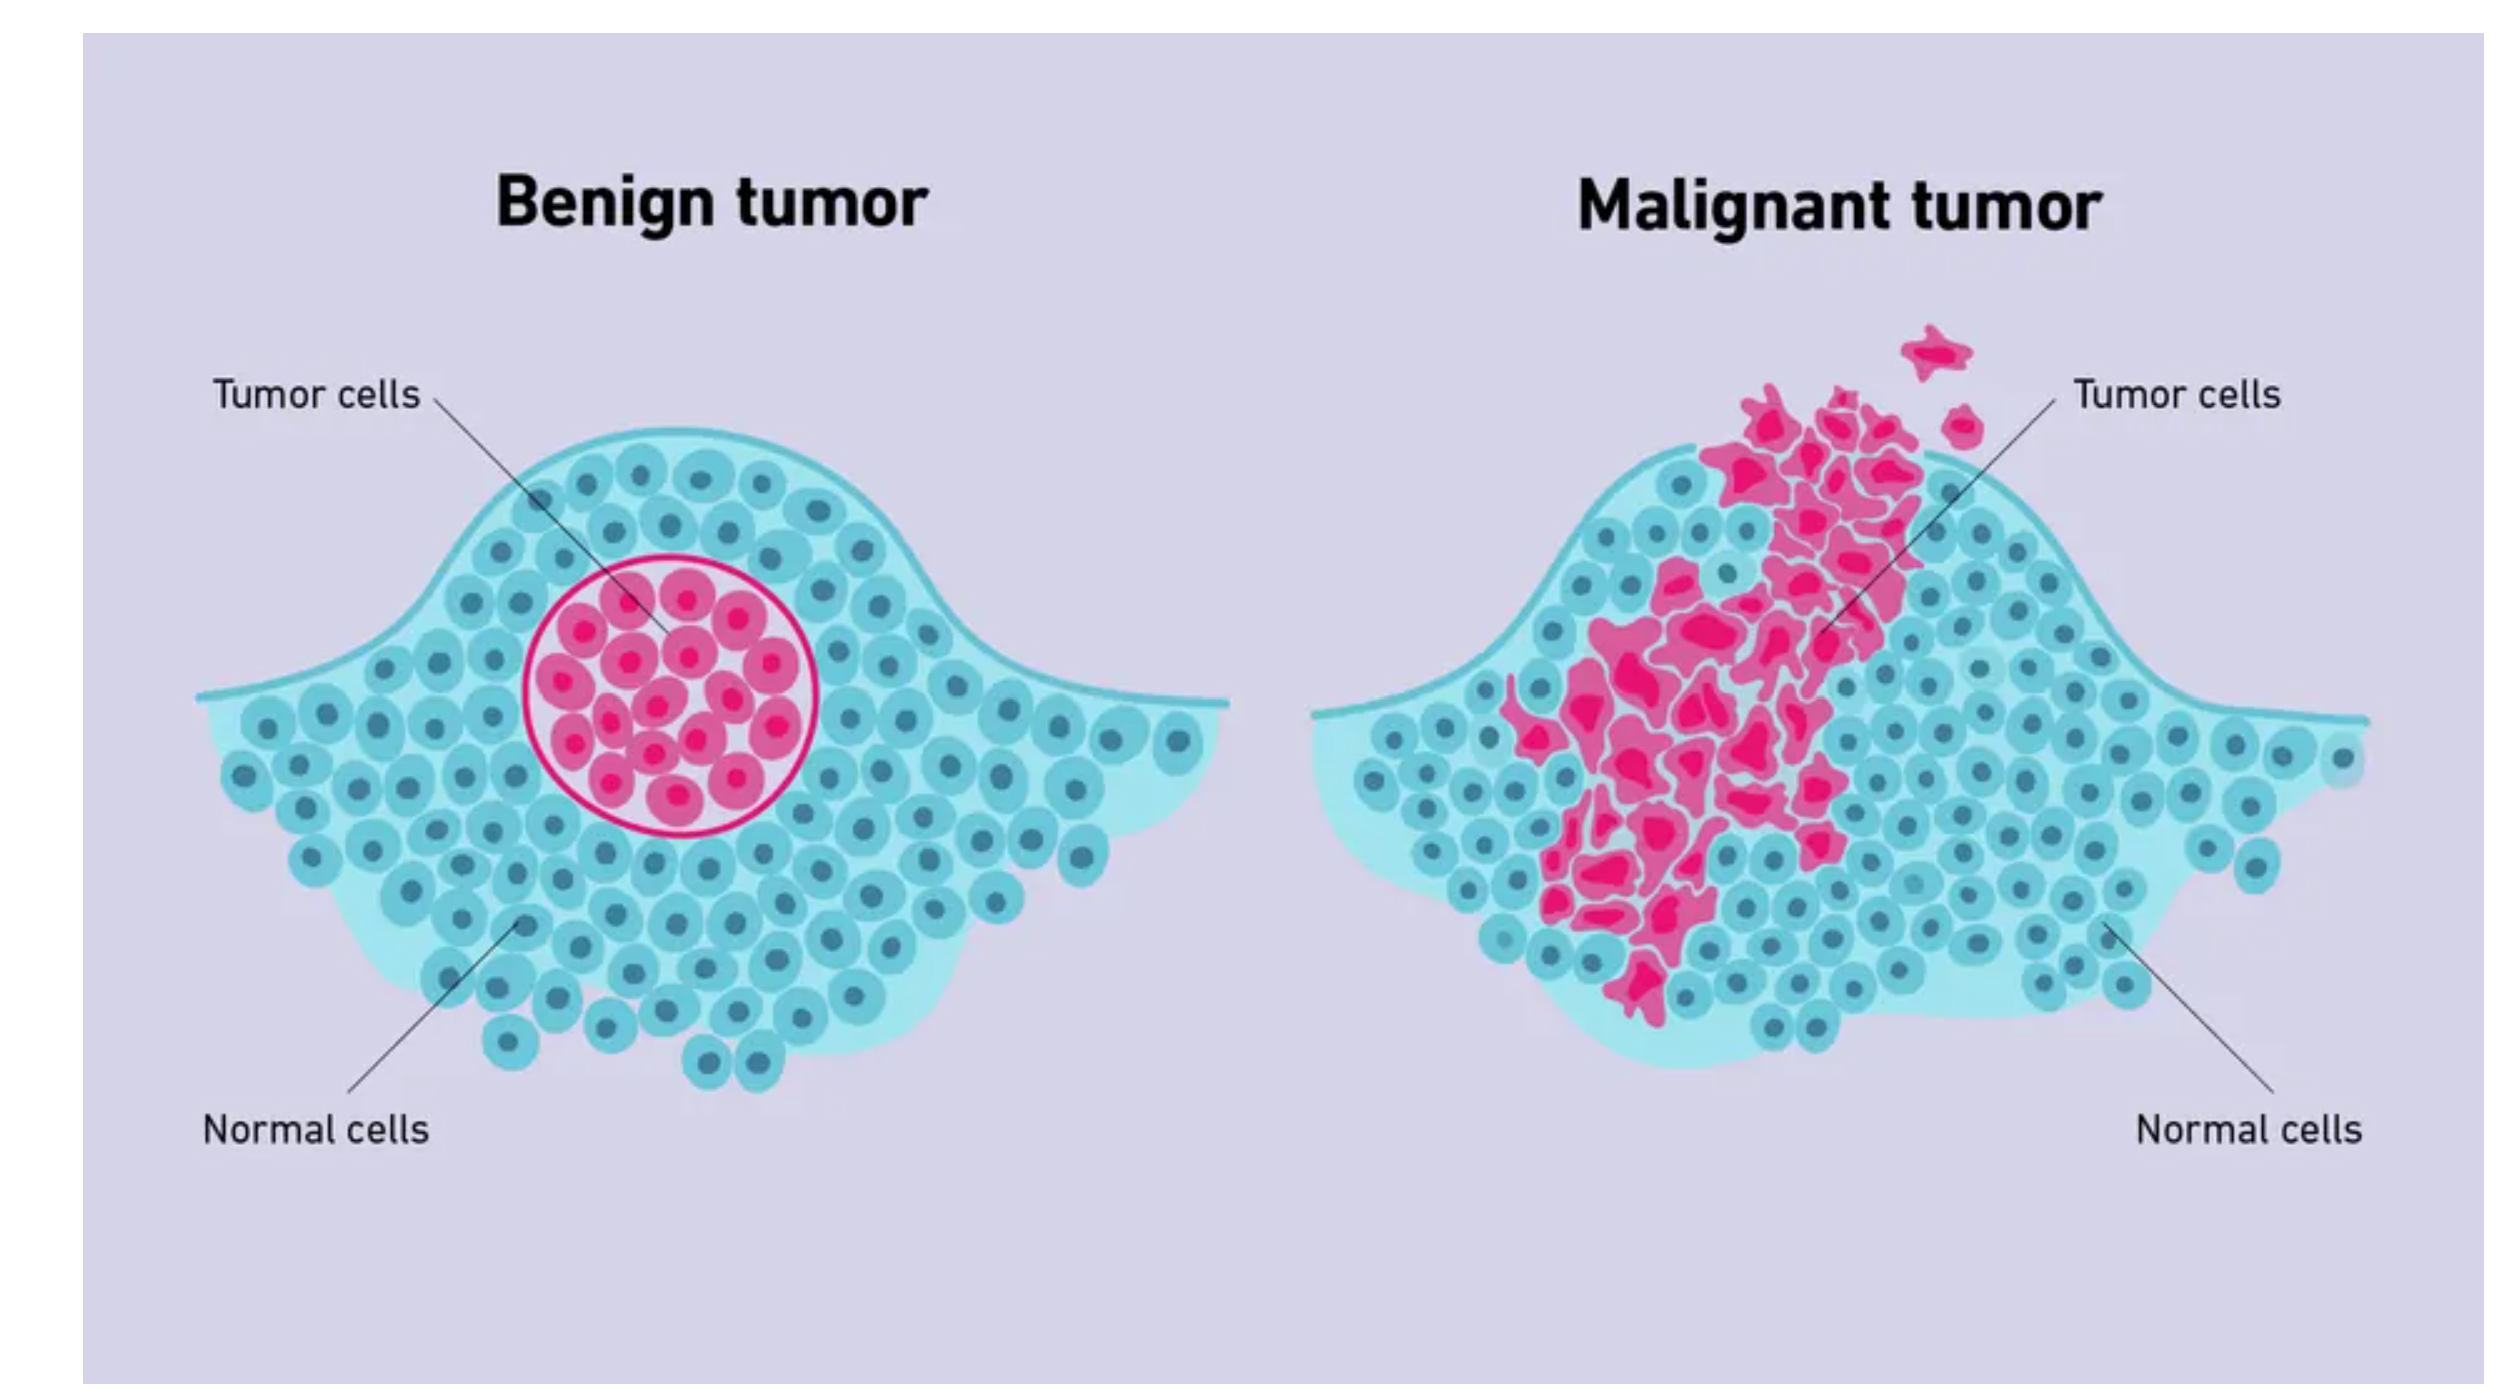

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [33]:
data = datasets.load_breast_cancer()
data.keys()

# print(data.data)
# data.target
# data.frame
# data.target_names
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [34]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['class'] = data.target

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [35]:
df.isnull().sum()
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension       class  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [36]:
df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

### Dataset Visualization

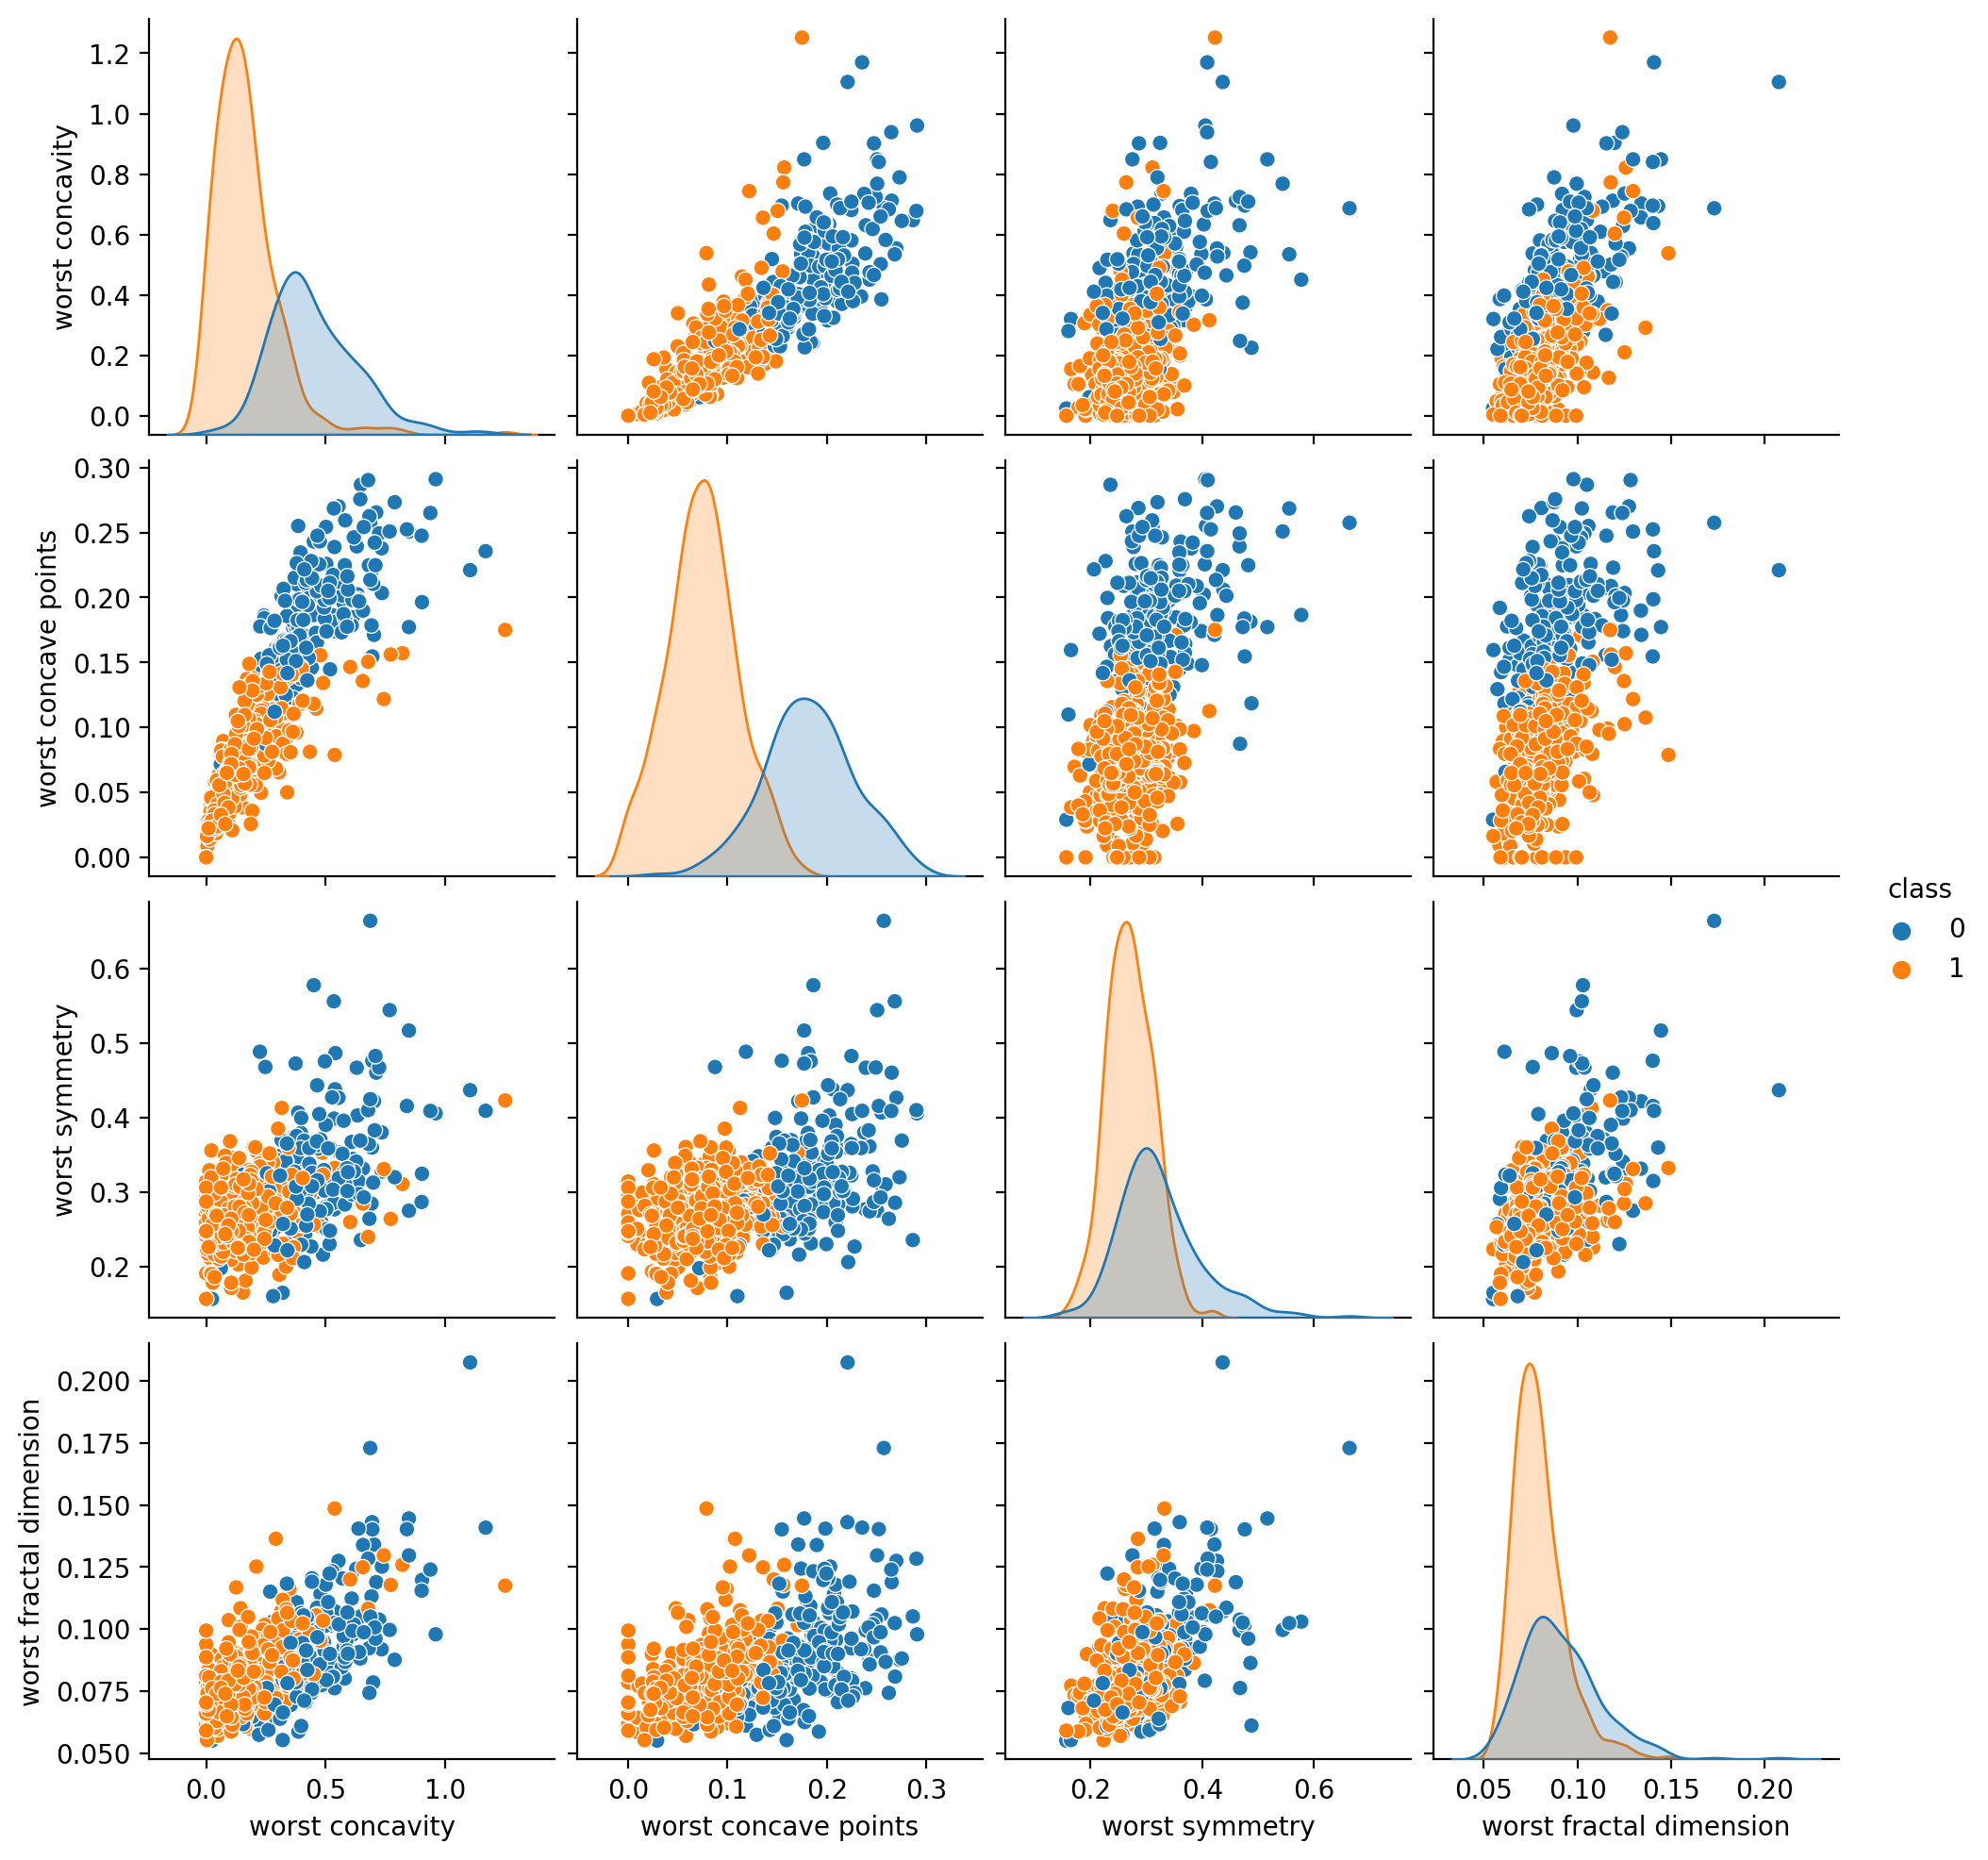

In [23]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 200
df.iloc[:, -5:]

sns.pairplot(df.iloc[:, -5:], hue='class')

<AxesSubplot:>

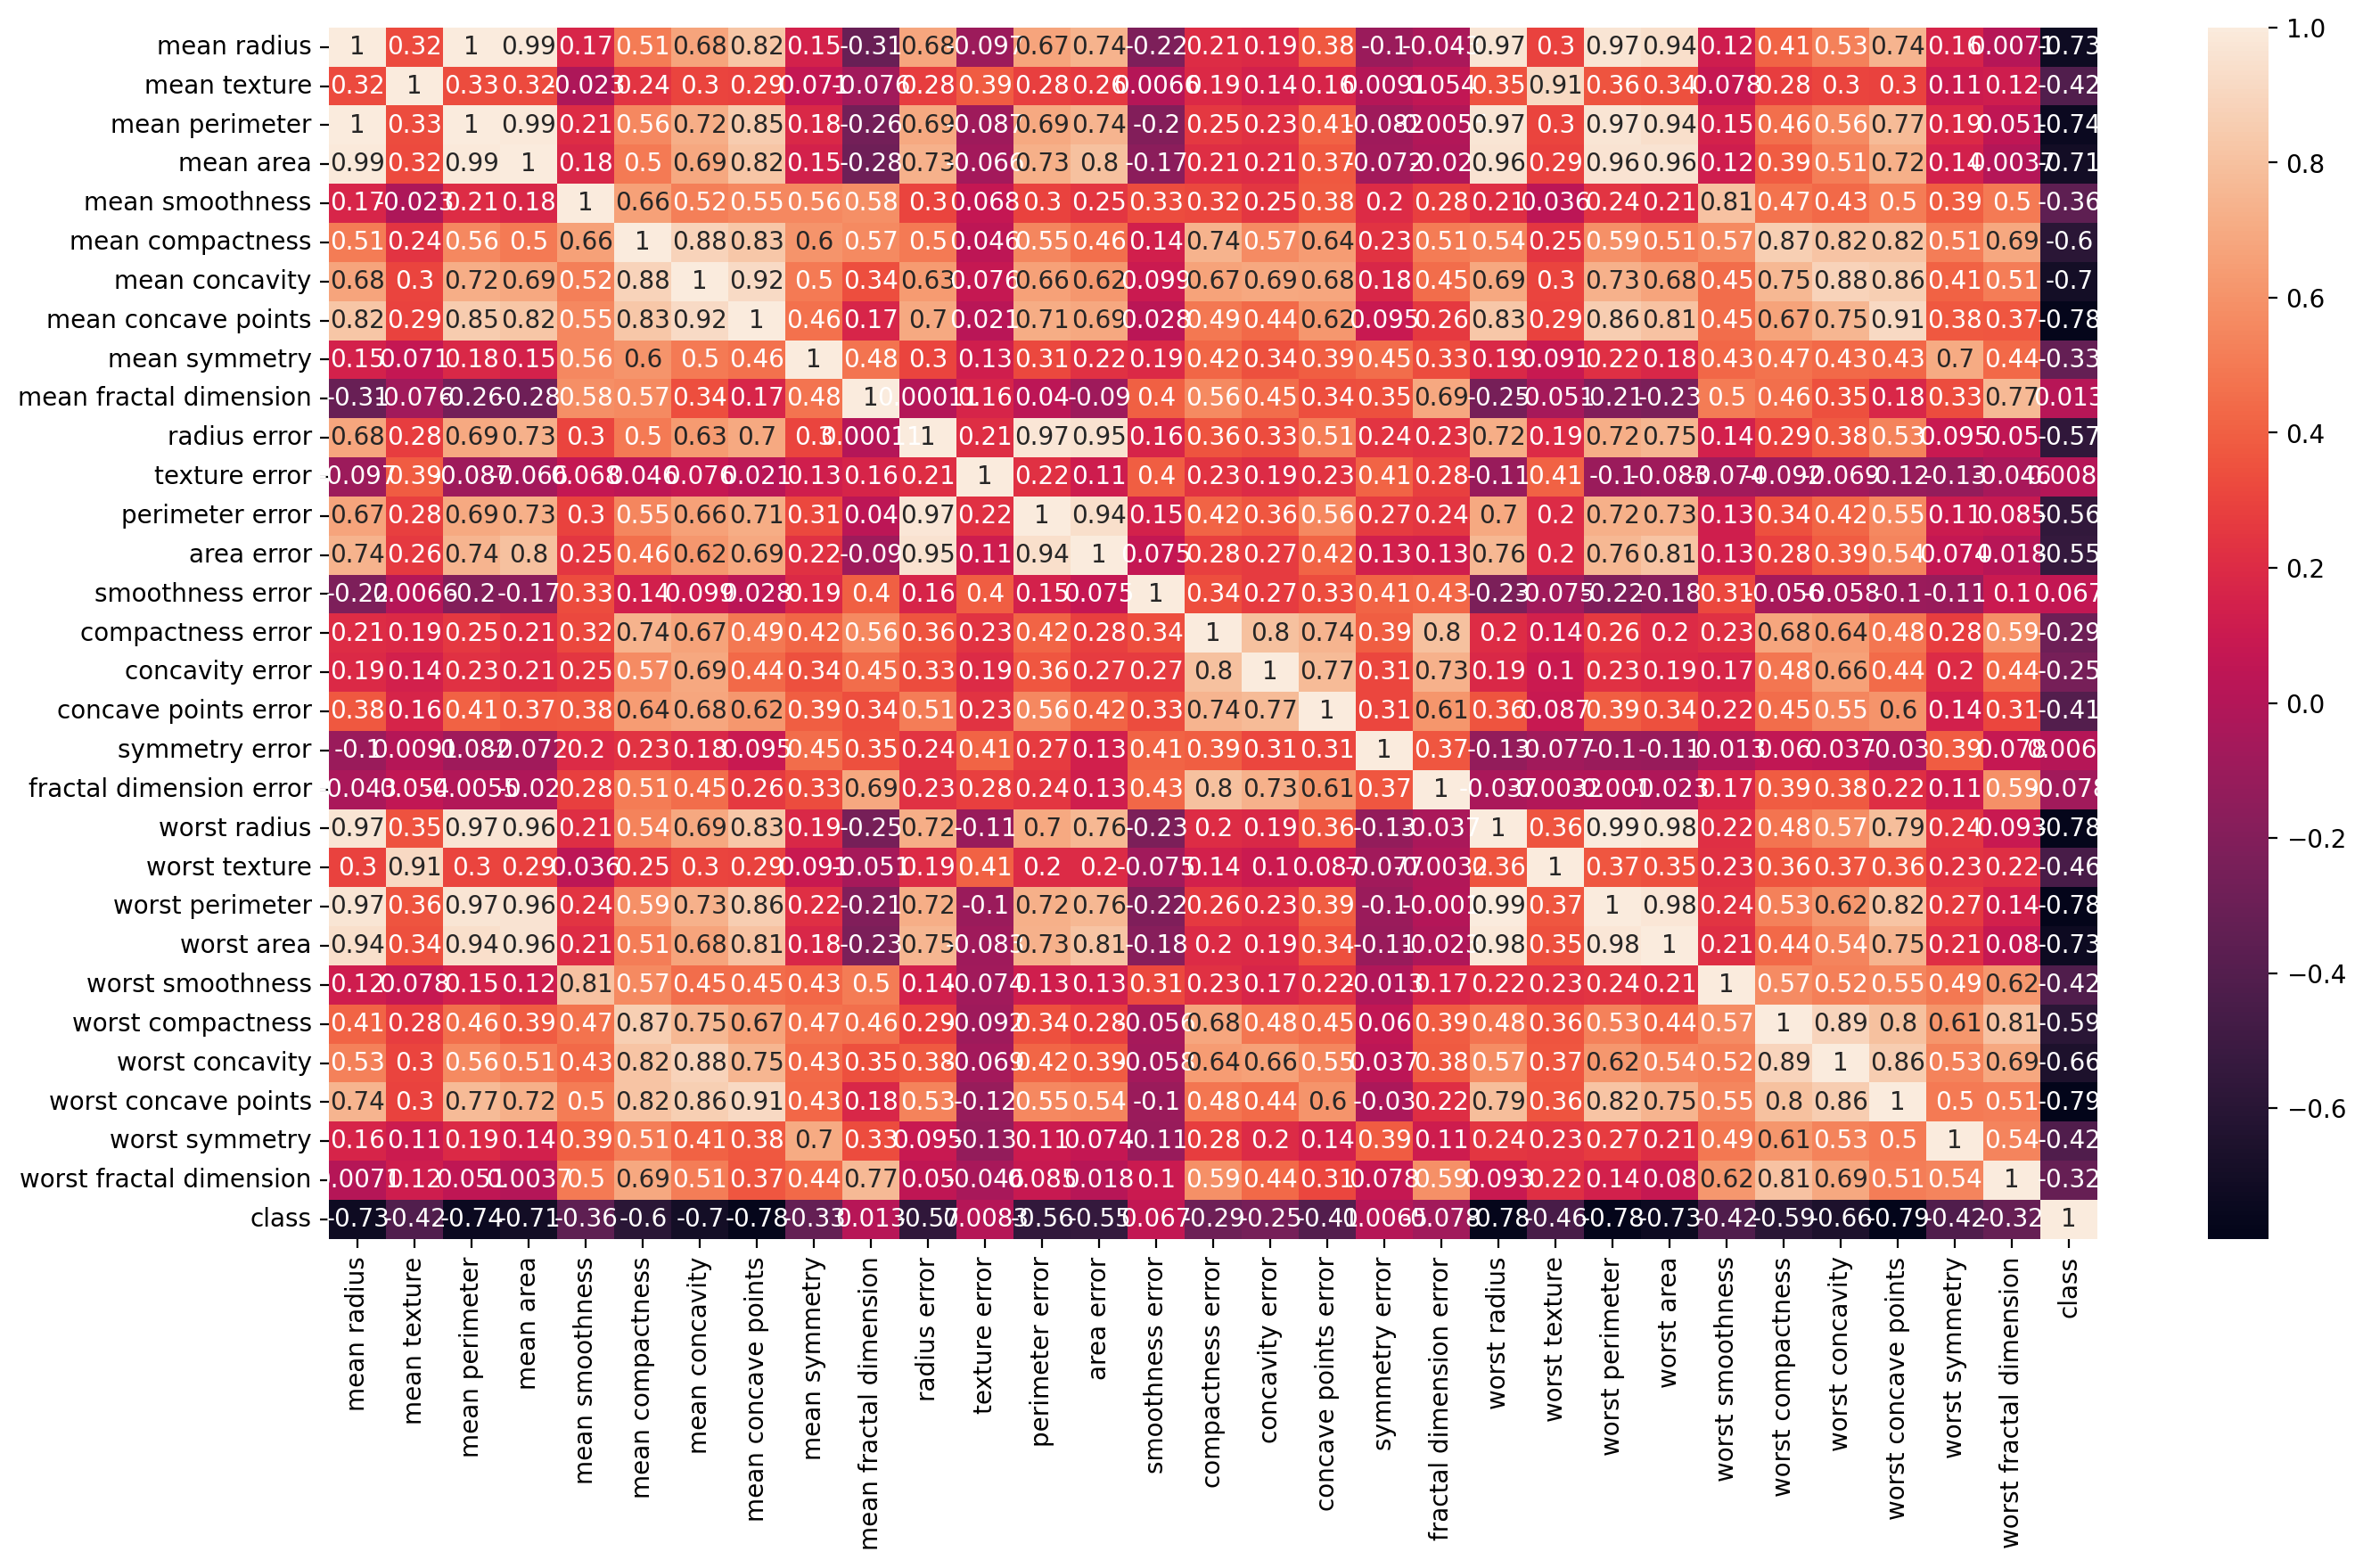

In [24]:
corr = df.corr()
sns.heatmap(corr, annot=True)

### Train Test Split
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

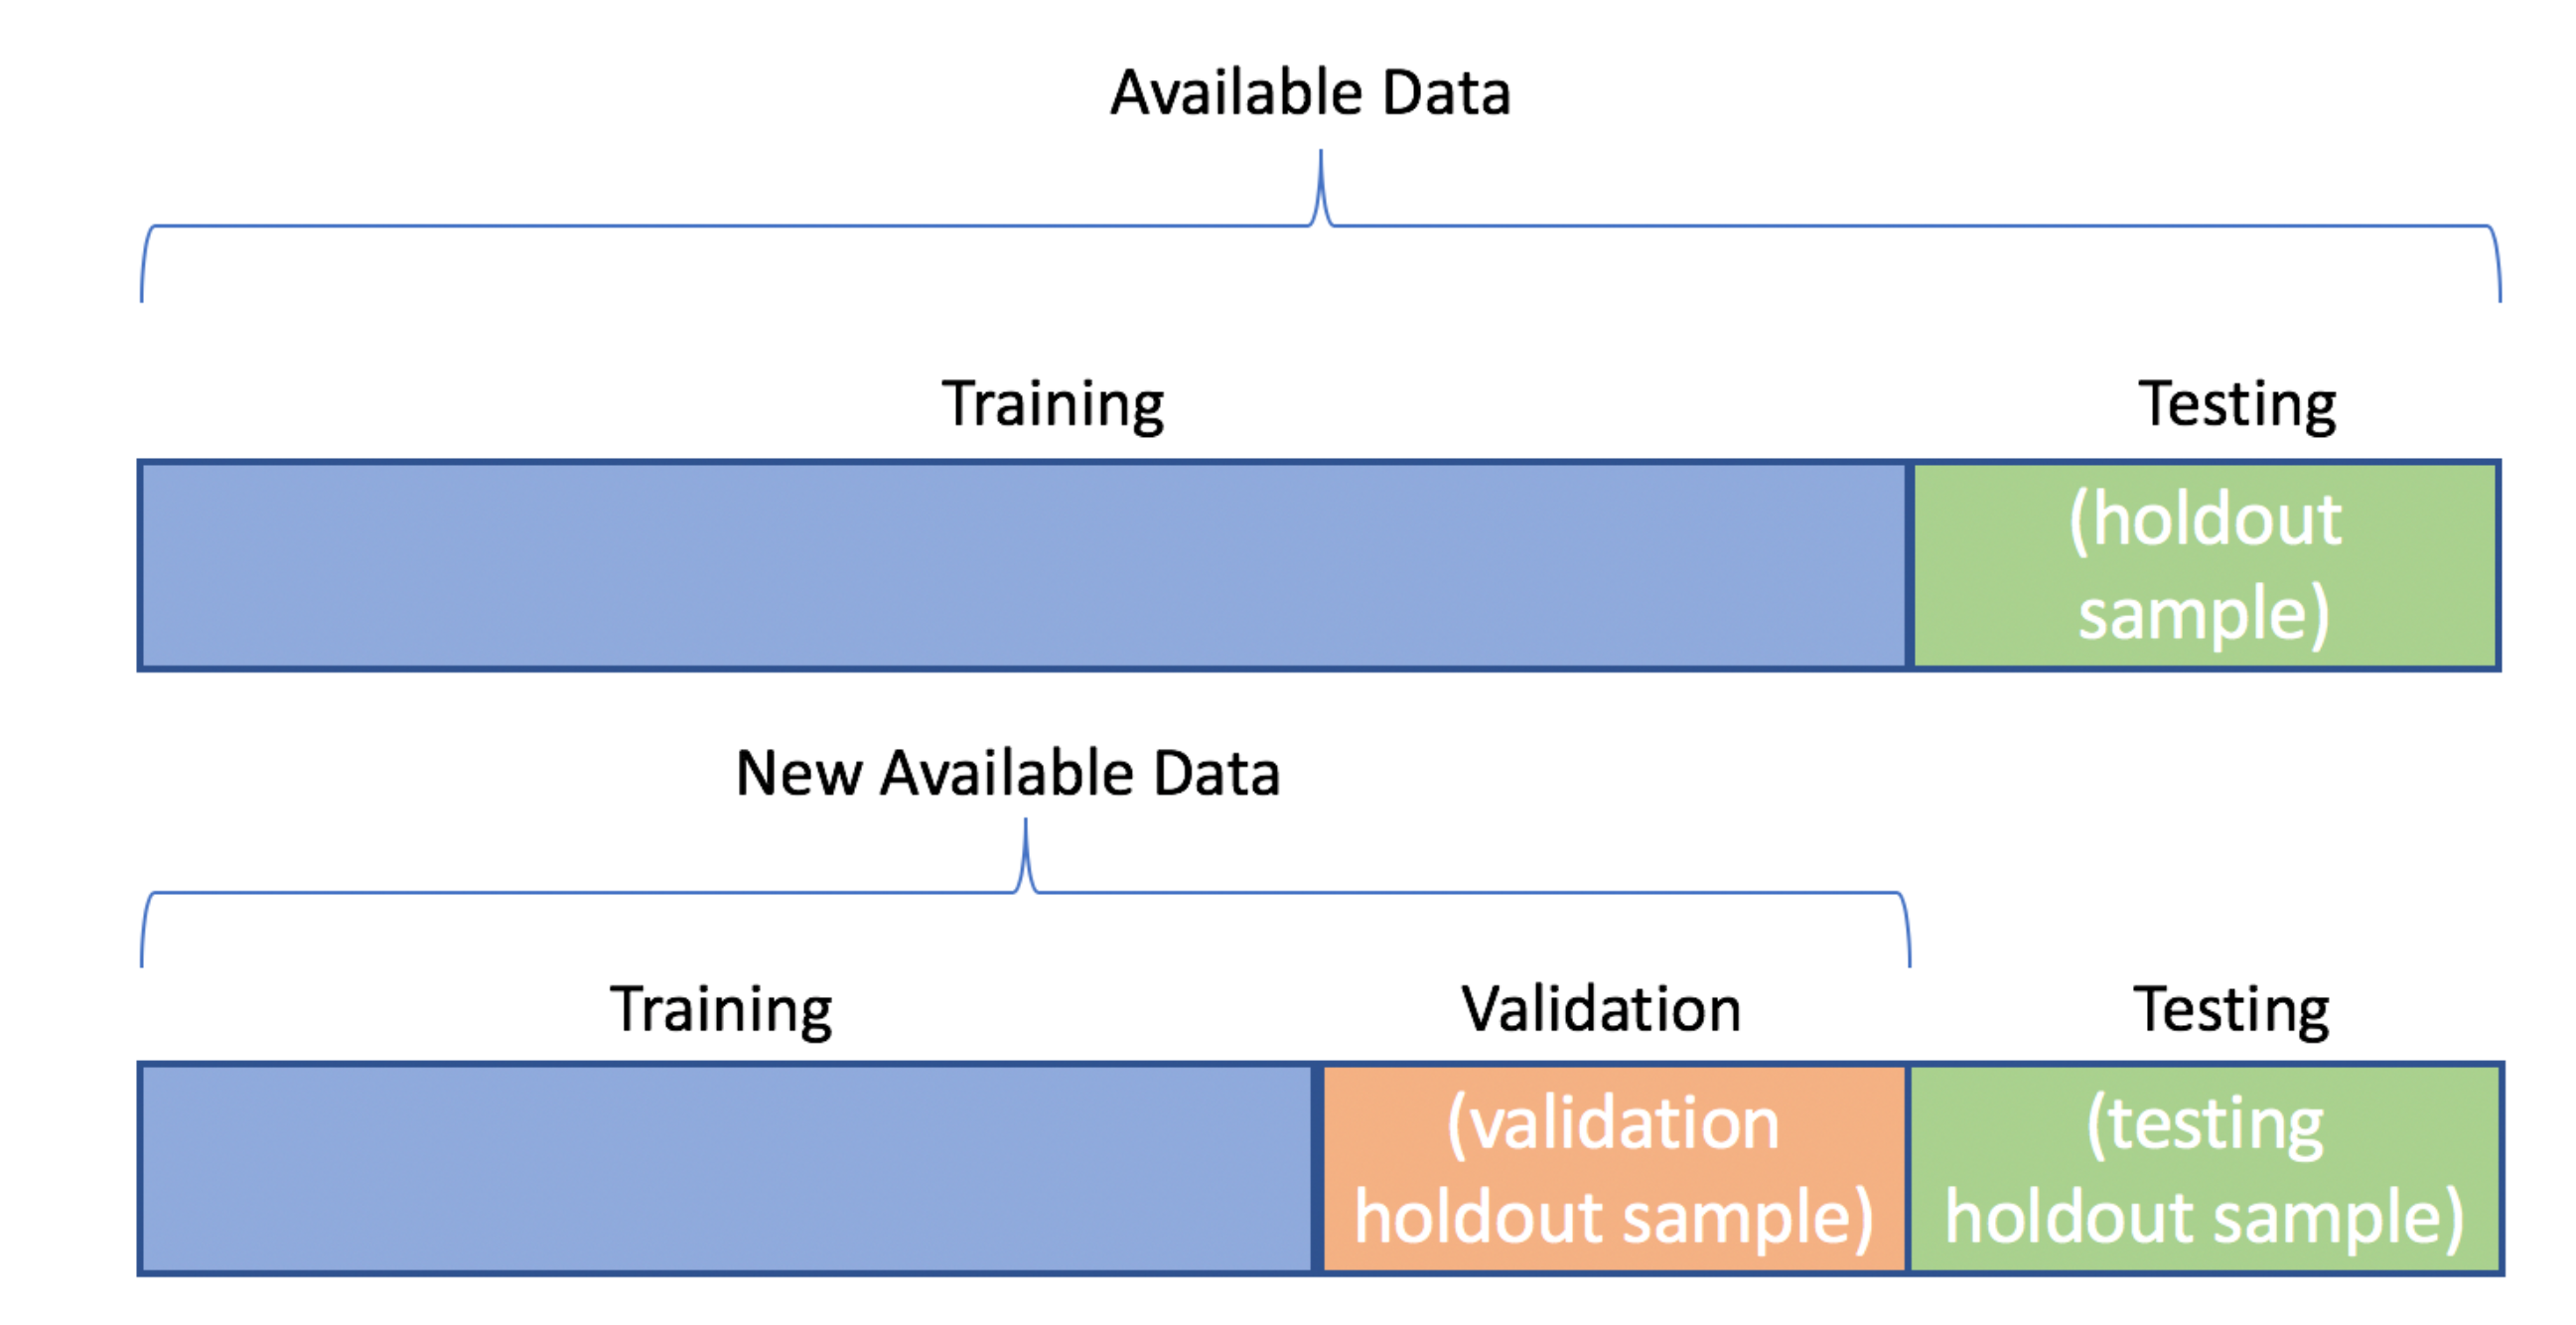

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
                            X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
X_train

array([[-1.07200079, -0.6584246 , -1.0880801 , ..., -1.35052668,
        -0.35265805, -0.54138003],
       [ 1.74874285,  0.06650173,  1.75115682, ...,  1.54991557,
         0.19107787, -0.1737386 ],
       [-0.97473376, -0.93112416, -0.99770871, ..., -1.70744192,
        -0.307734  , -1.21303263],
       ...,
       [ 0.39844772,  1.06867262,  0.50751384, ...,  1.53492543,
         0.16164487,  1.23754763],
       [ 0.85331409, -0.0380331 ,  0.9054796 , ...,  2.10455077,
         0.31035897,  0.36249578],
       [-0.91179628, -0.82431683, -0.87666079, ..., -0.51332734,
        -0.50756857,  1.30824791]])

### Model Training
#### Logistic Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[41  1]
 [ 1 71]]


In [41]:
svm = SVC()
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[41  1]
 [ 1 71]]


### Regularization
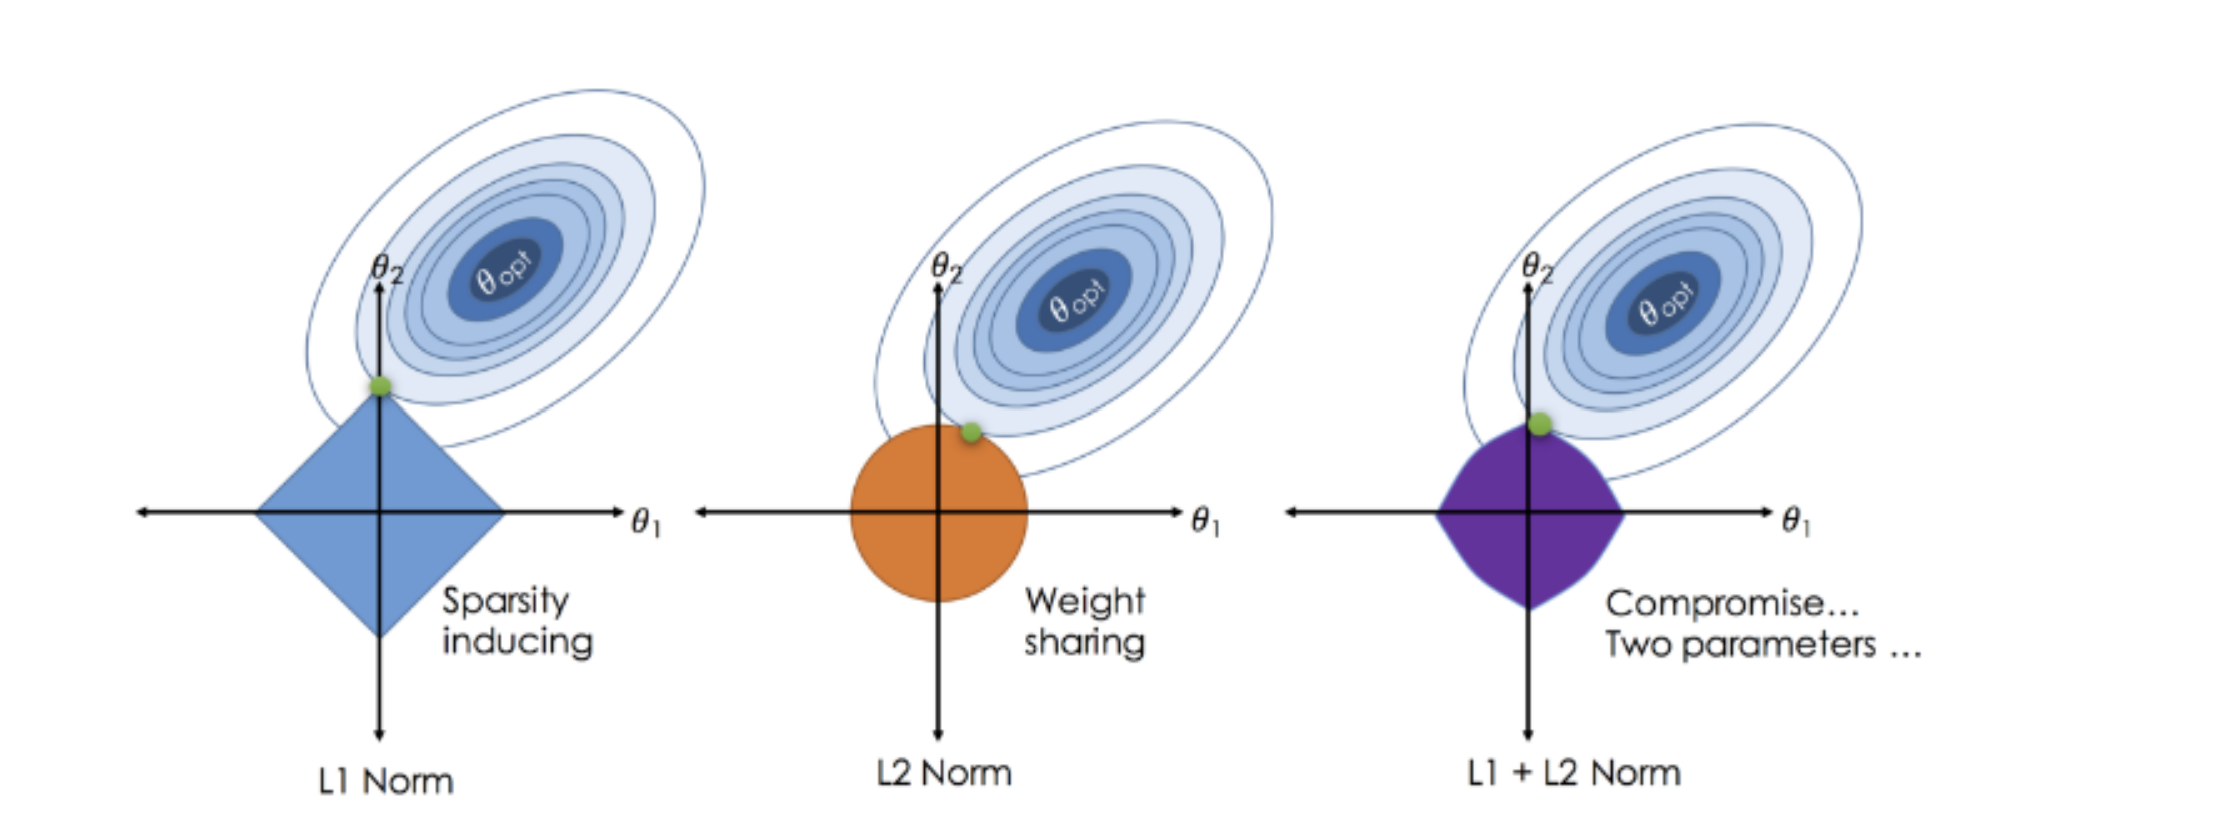

#### Lasso Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- Lasso regression is a regularization technique used to avoid overfitting of the model.
- It is used to penalize the model for having high complexity.
- It is also called L1 regularization.
- It is used to reduce the model complexity.
- It is used to reduce the model variance.
- It is used to reduce the model overfitting.
- It is used to reduce the model bias.
- It is used to reduce the model multicollinearity.

#### Ridge Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- Ridge regression is a regularization technique used to avoid overfitting of the model.
- It is used to penalize the model for having high complexity.
- It is also called L2 regularization.
- It is used to reduce the model complexity.
- It is used to reduce the model variance.
- It is used to reduce the model overfitting.
- It is used to reduce the model bias.
- It is used to reduce the model multicollinearity.



### Difference between Lasso and Ridge Regression
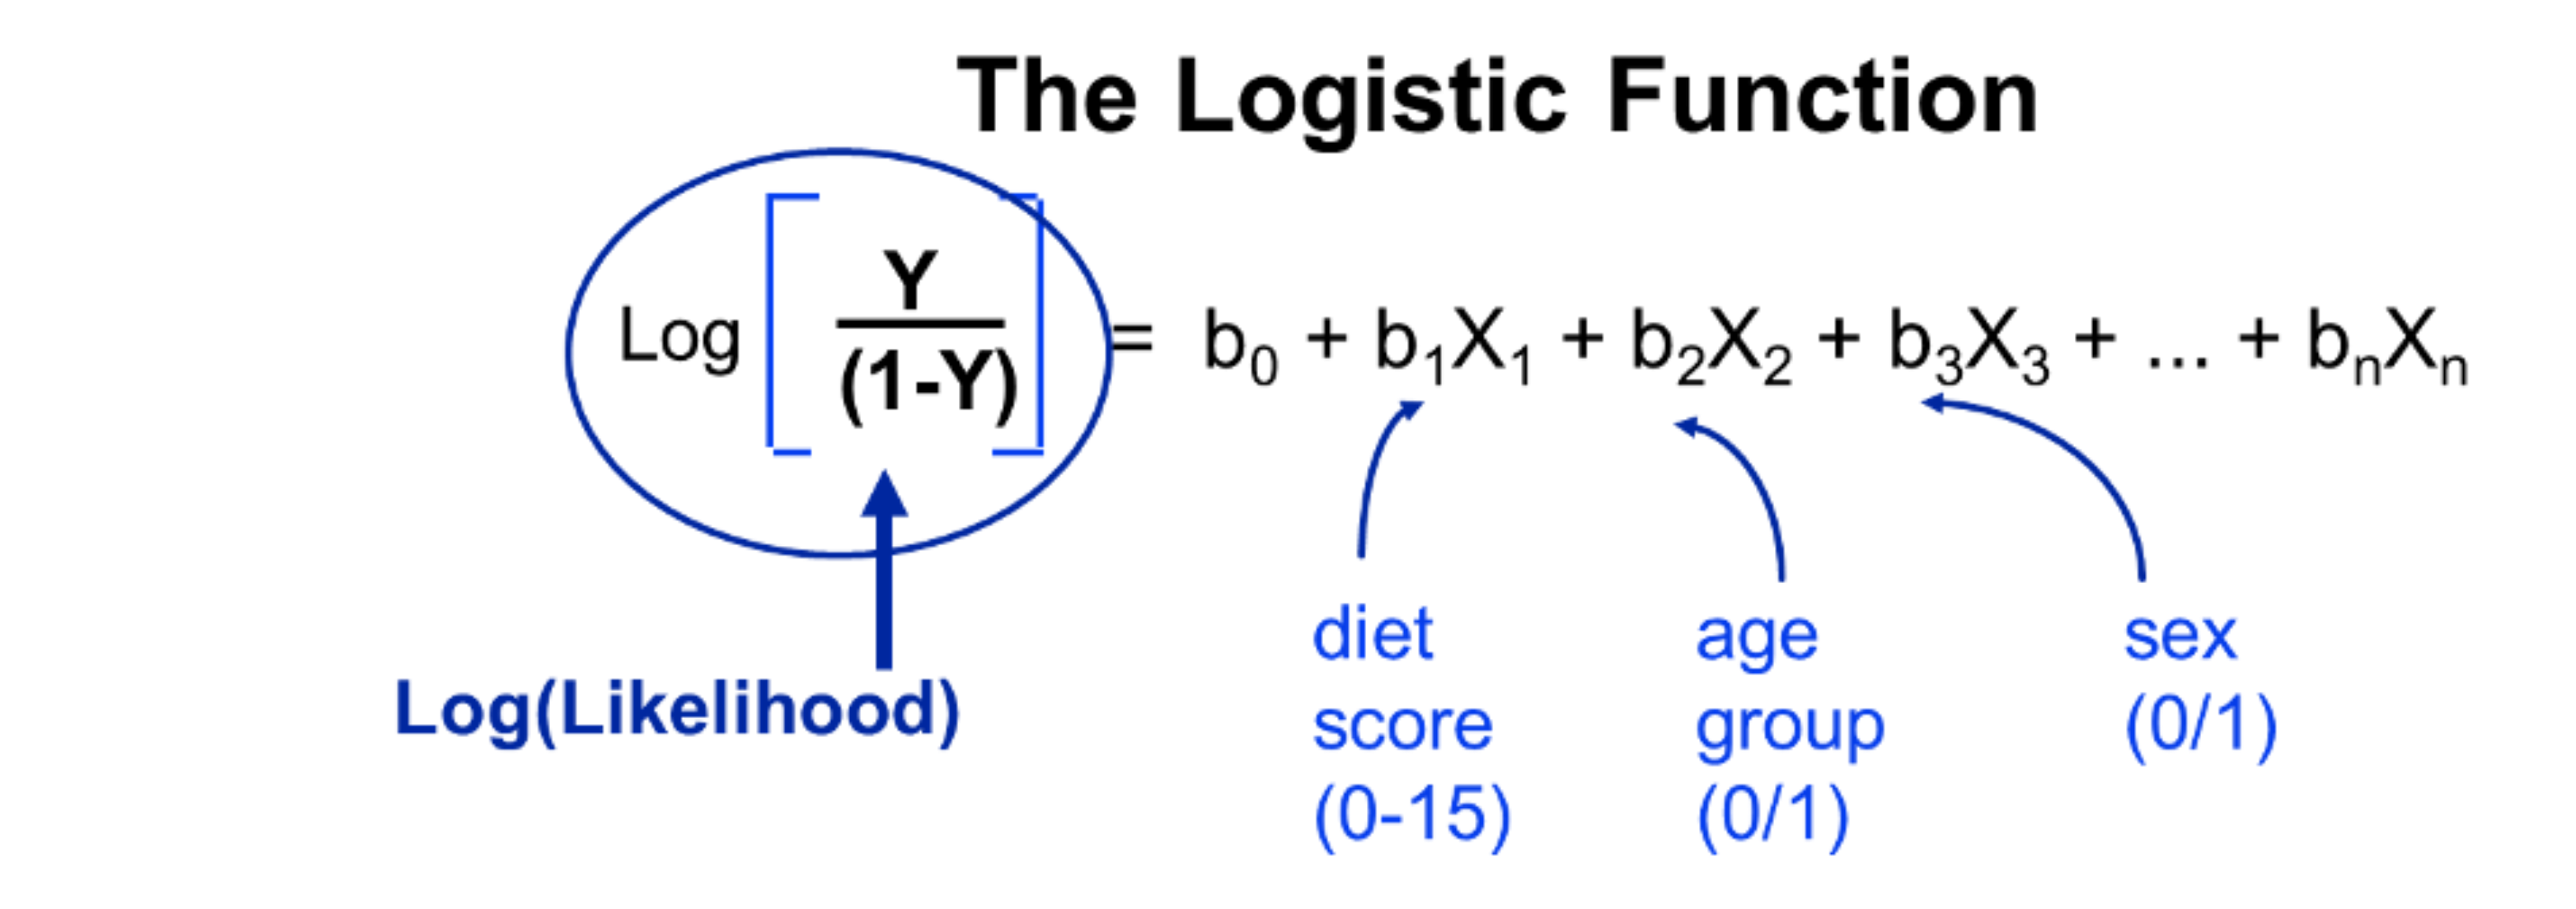

##### L1 Regularization
- L1 penalizes sum of absolute value of weights.
- L1 has a sparse solution
- L1 has multiple solutions
- L1 has built in feature selection
- L1 is robust to outliers
- L1 generates model that are simple and interpretable but cannot learn complex patterns
##### L2 Regularization
- L2 regularization penalizes sum of square weights.
- L2 has a non sparse solution
- L2 has one solution
- L2 has no feature selection
- L2 is not robust to outliers
- L2 gives better prediction when output variable is a function of all input features
- L2 regularization is able to learn complex data patterns

### Manual Hyperparameter Adjustment

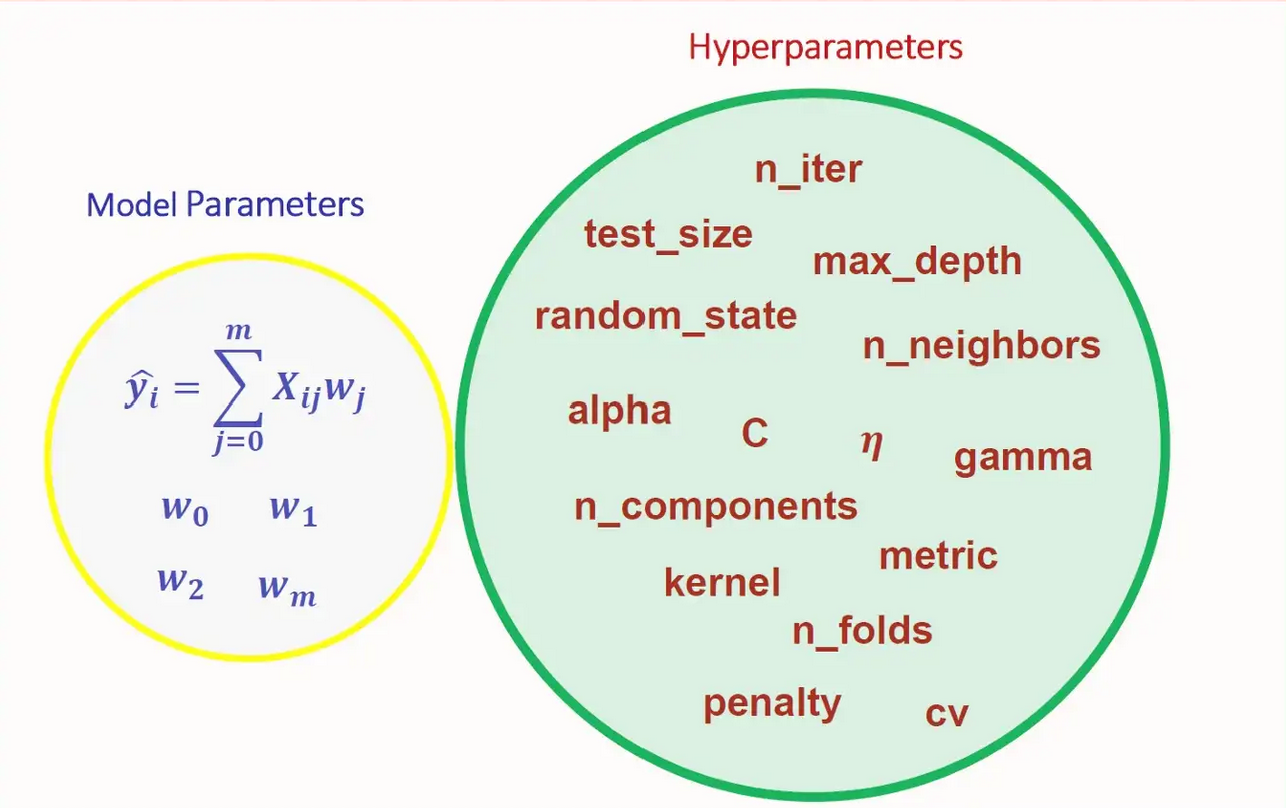

https://scikit-learn.org/stable/glossary.html#parameters

#### Logistic Regression
- Parameters
    - penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, default=’l2’
    - C : float, default=1.0
    - dual : bool, default=False
    - tol : float, default=1e-4
    - fit_intercept : bool, default=True
    - intercept_scaling : float, default=1
    - class_weight : dict or ‘balanced’, default=None
    - random_state : int, RandomState instance or None, default=None
    - solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
    - max_iter : int, default=100
    - multi_class : {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
    - verbose : int, default=0
    - warm_start : bool, default=False
    - n_jobs : int, default=None
    - l1_ratio : float or None, default=None

In [65]:
# lr = LogisticRegression(penalty='l1', solver='liblinear', C=1, max_iter=100,
#                        tol=0.0001)

lr = LogisticRegression(penalty='l2', solver='saga', C=1, max_iter=1000,
                       tol=0.1)


lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[41  1]
 [ 2 70]]


#### SVM
- Parameters
    - C : float, default=1.0
    - kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    - degree : int, default=3
    - gamma : {‘scale’, ‘auto’} or float, default=’scale’
    - coef0 : float, default=0.0
    - shrinking : bool, default=True
    - probability : bool, default=False
    - tol : float, default=1e-3
    - cache_size : float, default=200
    - class_weight : dict or ‘balanced’, default=None
    - verbose : bool, default=False
    - max_iter : int, default=-1
    - decision_function_shape : {‘ovo’, ‘ovr’}, default=’ovr’
    - break_ties : bool, default=False
    - random_state : int, RandomState instance or None, default=None

In [76]:
svm = SVC(kernel='rbf', C=1, tol=0.1, gamma=0.001)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

[[37  5]
 [ 0 72]]


### Cross Validation 
- https://scikit-learn.org/stable/modules/cross_validation.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
- Cross validation is a process of evaluating the model on the training data.
- It is used to check the performance of the model.

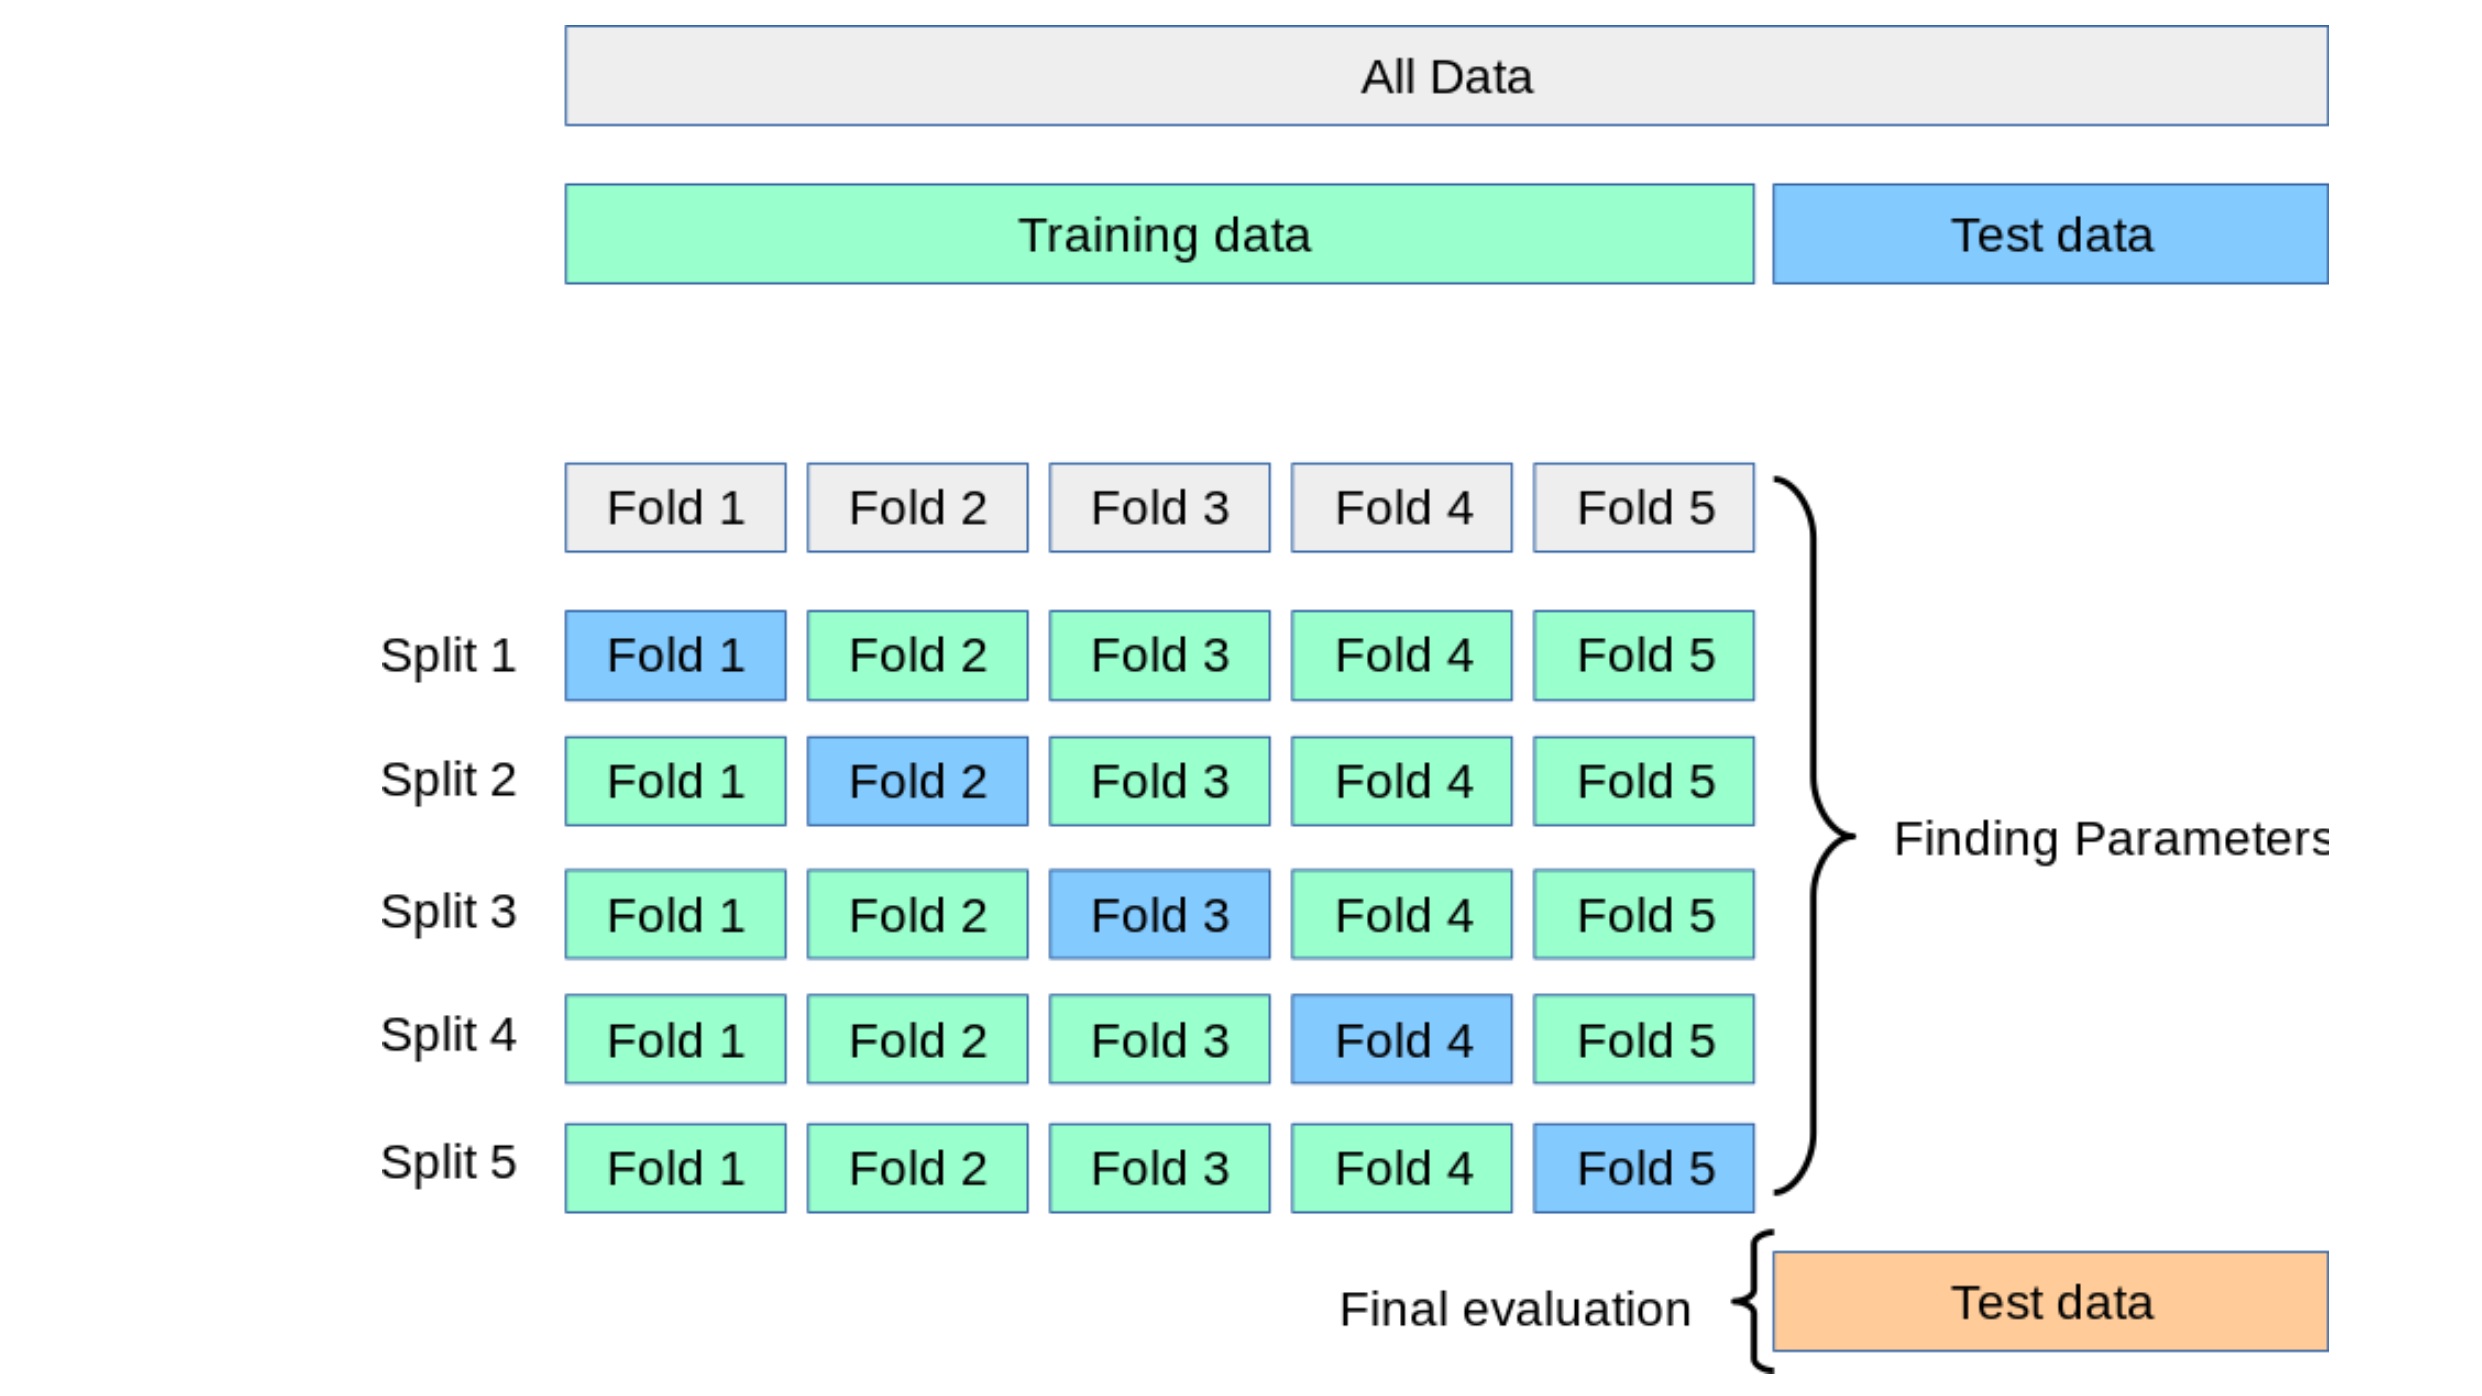


##### Types
- K-Fold Cross Validation
    - It uses k subsets of the data.
- Stratified K-Fold Cross Validation
    - It uses k subsets of the data.
    - It is used to maintain the class distribution in each fold.
- Leave One Out Cross Validation
    - It uses n-1 subsets of the data.
    - It is used when the data is small.
- Leave P Out Cross Validation
    - It uses n-p subsets of the data.
    - It is used when the data is small.
- Shuffle Split Cross Validation
    - It uses random subsets of the data.
- Group K-Fold Cross Validation
    - It uses k subsets of the data.
    - It is used to maintain the group distribution in each fold.
- Group Shuffle Split Cross Validation
    - It uses random subsets of the data.
    - It is used to maintain the group distribution in each fold.
- Time Series Split Cross Validation
    - It uses k subsets of the data.
    - It is used to maintain the time distribution in each fold.


In [81]:
from sklearn.model_selection import cross_validate

lr = LogisticRegression(penalty='l1', solver='liblinear')
scores = cross_validate(lr, X_train, y_train, cv=5, scoring='accuracy')

print(scores)
print("Mean Score:", scores['test_score'].mean())

{'fit_time': array([0.00102687, 0.00199389, 0.00197935, 0.00199413, 0.00202513]), 'score_time': array([0.00096846, 0.0010159 , 0.00099349, 0.00099659, 0.        ]), 'test_score': array([0.95604396, 0.97802198, 0.96703297, 0.98901099, 0.98901099])}
Mean Score: 0.9758241758241759


In [86]:
from sklearn.model_selection import LeaveOneOut
lr = LogisticRegression(penalty='l1', solver='liblinear')

loo = LeaveOneOut()
scores = cross_validate(lr, X_train, y_train, cv=loo, scoring='accuracy')
len(scores['test_score'])

print("Mean Score:", scores['test_score'].mean())

Mean Score: 0.9714285714285714


### HypyerParameter Tuning
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
- Hyperparameter tuning is a process of finding the best hyperparameters for the model.
- Hyperparameters are the parameters that are not learned by the model.
- Hyperparameters are the parameters that are set before the model is trained.
- Important hyperparameter for logistic regression
    - C
    - penalty
    - solver
    - max_iter

- Important hyperparameter for SVM
    - C
    - kernel
    - degree
    - gamma
    - max_iter

#### Grid Search
It takes the set of hyperparameter values as input and returns the best hyperparameter values.


In [97]:
from sklearn.model_selection import GridSearchCV

params = {'C':[0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver':['liblinear', 'saga', 'lbfgs'],
         'max_iter':[100, 1000]}

grid = GridSearchCV(LogisticRegression(), param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)


C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 

C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='accuracy')

In [93]:
grid.best_estimator_, grid.best_params_, grid.best_score_

(LogisticRegression(C=0.1, solver='saga'),
 {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'},
 0.9802197802197803)

In [94]:
y_predict = grid.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[40  2]
 [ 1 71]]


### Random Grid Search
- One of the drawbacks of grid search is that it is computationally expensive.
- Random grid search is a process of finding the best hyperparameter values by randomly selecting the hyperparameter values.
- It is computationally less expensive than grid search.

In [98]:
from sklearn.model_selection import RandomizedSearchCV

params = {'C':[0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver':['liblinear', 'saga', 'lbfgs'],
         'max_iter':[100, 1000]}

grid = RandomizedSearchCV(LogisticRegression(), params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\model_selection\_v

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'max_iter': [100, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga',
                                                   'lbfgs']},
                   scoring='accuracy')

In [99]:
grid.best_estimator_, grid.best_params_, grid.best_score_

(LogisticRegression(C=0.1, max_iter=1000),
 {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000, 'C': 0.1},
 0.9802197802197803)

In [100]:
y_predict = grid.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[40  2]
 [ 1 71]]


# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
